In [13]:
import pandas as pd

from pycaret.time_series import TSForecastingExperiment
from pycaret.time_series import *

In [5]:
global_fig_settings = {
    # "renderer": "notebook",
    "renderer": "png",
    "width": 1000,
    "height": 600,
}

In [2]:
data = pd.read_excel("compile_tegal.xlsx")

target = "Persentase Kemiskinan"
exog_vars = ['Biaya rumah', 'Biaya kuliah', 'Biaya sekolah','Biaya bensin','Biaya listrik']
include = [target] + exog_vars
data = data[include]
data.head()

,Persentase Kemiskinan,Biaya rumah,Biaya kuliah,Biaya sekolah,Biaya bensin,Biaya listrik
0,13.11,0,0,0,0,0
1,11.51,46,36,18,0,0
2,10.75,0,0,0,0,0
3,10.58,0,0,0,0,0
4,9.87,0,0,0,0,0


In [16]:
FH=1
metric = "mape"
exclude = ["auto_arima", "bats", "tbats", "lar_cds_dt", "par_cds_dt"]

In [34]:
exp_auto = TSForecastingExperiment()

# enforce_exogenous=False --> Use multivariate forecasting when model supports it, else use univariate forecasting
exp_auto.setup(
    data=data, target=target, fh=2, enforce_exogenous=False,
    numeric_imputation_target="ffill", numeric_imputation_exogenous="ffill",
    fig_kwargs=global_fig_settings, session_id=42
)

,Description,Value
0,session_id,42
1,Target,Persentase Kemiskinan
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(14, 6)"
5,Transformed data shape,"(14, 6)"
6,Transformed train set shape,"(12, 6)"
7,Transformed test set shape,"(2, 6)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [35]:
# Include slower models like Prophet (turbo=False), but exclude some specific models ----
best = exp_auto.compare_models(sort=metric, turbo=True, exclude=exclude)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:32:12
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
naive,Naive Forecaster,1.5234,1.1204,0.8300,0.8607,0.1025,0.0940,-1.4351,4.6000
exp_smooth,Exponential Smoothing,1.7477,1.2816,0.9768,1.0185,0.1196,0.1145,-7.2666,0.0800
polytrend,Polynomial Trend Forecaster,1.7253,1.3233,1.0649,1.1105,0.1201,0.1243,-66.3471,3.1800
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,1.7223,1.3172,1.0650,1.1083,0.1202,0.1247,-65.7078,0.3533
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.7468,1.3411,1.0922,1.1360,0.1222,0.1281,-80.2160,0.8333
theta,Theta Forecaster,1.7853,1.3079,1.0417,1.0624,0.1232,0.1214,-19.9001,0.1667
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,1.7896,1.4049,1.0936,1.1630,0.1234,0.1258,-71.4434,0.8400
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,1.8075,1.4153,1.0974,1.1574,0.1236,0.1248,-80.6284,6.2367
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,1.8339,1.4408,1.1246,1.1830,0.1256,0.1284,-102.4303,0.2433
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,1.8178,1.3918,1.1206,1.1656,0.1264,0.1308,-73.7991,0.1533


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

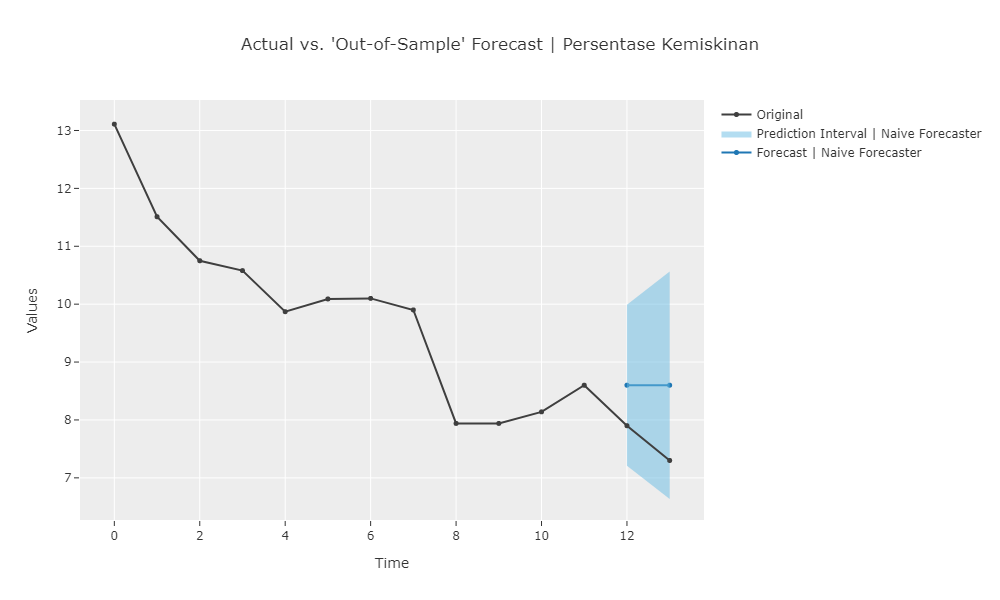

In [36]:
exp_auto.plot_model(best)

In [38]:
# predict on test set
holdout_pred = predict_model(exp_auto)

AttributeError: 'TSForecastingExperiment' object has no attribute 'check_is_fitted'